### ニューラルネットワークの構築（分類）
出力が対応する枠に分類される確率となる問題、すなわち分類問題

### 実装するニューラルネットワーク
今回は、以下に示す3層のニューラルネットワークを実装します。  
  
 <img src="../images/nn_classification.png">
 
 このニューラルネットワークは、入力層（ニューロン数: n=2）、中間層（n=2）、出力層(n=2)の3層構造です。  
 回帰の際と、層の数及び入力層、中間層は変わりませんが、出力層にはニューロンが2つある点が異なります。  
 出力層の活性化関数にはソフトマックス関数を用いる。
 このニューラルネットワークに入力を順伝播させて、出力を今回もグリッドで表示します。

### 各層の実装
中間層は、回帰の場合と変わらない。  
出力層では、活性化関数としてソフトマックス関数を用います。

In [ ]:
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))

出力層（ソフトマックス関数）

In [ ]:
# 出力層
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u)) # ソフトマックス関数

ソフトマックス関数では出力を確率として解釈可能なので。出力層の2つのニューロンの出力を比較して、大きい方にネットワークの入力を分類します

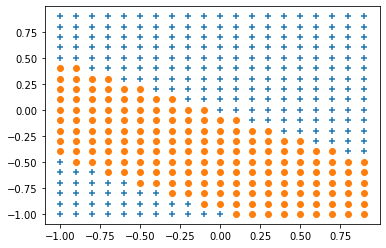

In [19]:
# 全体のコード
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 中間層
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))# シグモイド関数

# 出力層
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u)) # ソフトマックス関数

X = np.arange(-1.0, 1.0,  0.1) #　要素数は20個
Y = np.arange(-1.0, 1.0, 0.1)

# 重み
w_im = np.array([[1.0, 2.0],
                                [2.0, 4.0]]) # 中間層 2×2の行列

w_mo = np.array([[-1.0,1.0],
                                  [1.0, -1.0]]) # 出力層 2×2の行列

# バイアス
b_im = np.array([0.3, -0.3]) # 中間層
b_mo = np.array([0.4, 0.1]) # 出力層

# 分類結果を格納するリスト
x_1 = []
y_1 = []
x_2 = []
y_2 = []

# グリッドの各マスでニューラルネットワークの演算
for i in range(20):
    for j in range(20):
        
        # 順伝播
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        #※こうやって実装するんだって勉強になったところ
        # 確率の大小を分割を比較し、(入力値を)分割する。
        if out[0] > out[1]:
            # out[0]がout[1]より大きい場合はx1,y1に値を格納する。
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            # out[0]がout[1]より小さい場合はx2,y2に値を格納する。
            x_2.append(X[i])
            y_2.append(Y[j])
            
# 散布図の表示
plt.scatter(x_1, y_1, marker = '+')
plt.scatter(x_2, y_2, marker = 'o')
plt.show()

格子状に表される入力が、2つの領域に分類される様子が観察できます。  
回帰の場合と比較して結果に連続性はありませんが、境界が明確になっています。  
  
今回は入力を2つに分類しましたが、出力層のニューロンの数を増やせば3つ以上に分類することも可能です。  
  
また、ニューロンや層の数を増やすことで、さらに複雑な境界で入力を分類できるようになります。